In [2]:
%pylab inline
from SimPEG import *

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 15 days


In [3]:
def petaonfun(eta, tau, t):
    petaon = 1-eta*np.exp(-1./(1-eta)/tau*t)
    return petaon
def petaofffun(eta, tau, t):
    petaoff = eta*np.exp(-1./(1-eta)/tau*t)
    return petaoff

In [4]:
matplotlib.rcParams.update({'font.size': 16})

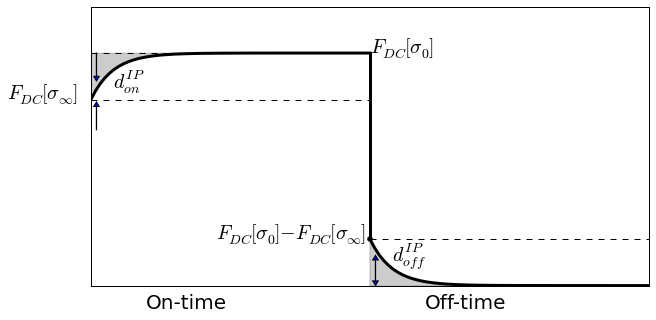

In [5]:
time_on = np.linspace(0, 1., 61)
time_off = time_on+time_on[-1]
eta = 0.2
tau = 0.1
temp_on = petaonfun(eta, tau, time_on)
temp_off = petaofffun(eta, tau, time_on)
kwargs = {"head_width":0.02, "head_length":0.02}
fig, ax = plt.subplots(1,1, figsize  = (10,5))
ax.plot(time_on, temp_on, 'k-', lw = 3)
ax.plot(time_off, temp_off, 'k-', lw = 3)
ax.fill_between(time_on, np.ones(time_on.size), temp_on, color='k', alpha = 0.2)
ax.fill_between(time_off, temp_off, where=np.zeros(time_off.size)<=temp_off, color='k', alpha = 0.2)
ax.set_ylim(0., 1.2)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Potential (V)')
ax.text(-0.30, 0.8, '$F_{DC}[\sigma_{\infty}]$', fontsize = 20)
ax.plot(np.r_[0,1],np.ones(2)*0.8, 'k--')
ax.text(1.0, 1.0, '$F_{DC}[\sigma_{0}]$', fontsize = 20)
ax.plot(np.r_[0,1],np.ones(2)*1., 'k--')
ax.text(0.45, 0.2, '$F_{DC}[\sigma_{0}]-F_{DC}[\sigma_{\infty}]$', fontsize = 20)
ax.plot(np.r_[1,2],np.ones(2)*0.2, 'k--')
ax.plot(np.ones(2), np.r_[1.0, 0.2], 'k', lw=3)
ax.text(0.2, -0.1, 'On-time', fontsize = 20)
ax.text(1.2, -0.1, 'Off-time', fontsize = 20)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.arrow(0.02, 1.0, 0., -0.1, **kwargs)
ax.arrow(0.02, 0.67, 0.,  0.1, **kwargs)
ax.text(0.08, 0.85, '$d^{IP}_{on}$', fontsize = 20)
ax.arrow(0.02+1., 0.06, 0., 0.05, **kwargs)
ax.arrow(0.02+1., 0.06, 0., -0.04, **kwargs)
ax.text(0.08+1., 0.1, '$d^{IP}_{off}$', fontsize = 20)
ax.plot(1, 0.2, 'ko', ms = 5)
fig.savefig("../figures/EIPcurve.png", dpi = 100.)

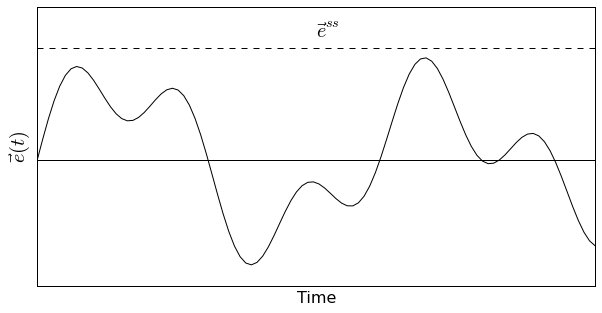

In [6]:
x = np.linspace(0, np.pi, 100)
y = sin(1*np.pi*x)+sin(1.2*np.pi*x)+sin(3*np.pi*x)
fig, ax = plt.subplots(1,1, figsize = (10, 5))
ax.plot(x, y, 'k')
ax.plot(x, np.ones_like(x)*y.max()*1.1, 'k--')
ax.plot(x, np.zeros_like(x), 'k-')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(1.2*y.min(), 1.5*y.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Time", fontsize = 16)
ax.set_ylabel("$\\vec{e}(t)$", fontsize = 20)
ax.text(0.5*np.pi, y.max()*1.2, "$\\vec{e}^{ss}$", fontsize = 20)
fig.savefig("../figures/Oscillating_e.png", dpi = 100.)

In [7]:
def ColeColeC1(siginf, eta, tau, f):
    omega = f*np.pi*2
    sigma = siginf-siginf*eta/(1+(1-eta)*1j*omega*tau)
    return sigma
def ColeColeC1T(siginf, eta, tau, t):
    sigma = -siginf*eta/((1-eta)*tau)*np.exp(-t/(1-eta)/tau)
    return sigma

In [8]:
# plt.xkcd()

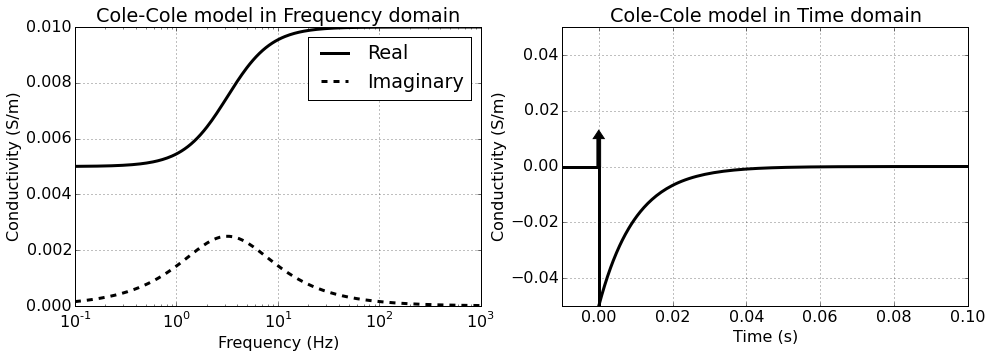

In [9]:
f = np.logspace(-1, 3, 2**8)
t = np.logspace(-5, -0.5, 2**8)
fig, ax = plt.subplots(1,2, figsize = (16, 5))
ax[0].semilogx(f, ColeColeC1(0.01, 0.5, 0.1, f).real, 'k', lw=3)
ax[0].semilogx(f, ColeColeC1(0.01, 0.5, 0.1, f).imag, 'k--', lw=3)
ax[0].set_ylabel("Conductivity (S/m)")
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid(True)
ax[0].set_title("Cole-Cole model in Frequency domain")
ax[0].legend(("Real", "Imaginary"), loc=1)
ax[1].plot(t, ColeColeC1T(0.001, 0.5, 0.02, t), 'k', lw=3)
ax[1].plot(np.r_[-0.01, 0.], np.r_[0., 0.], 'k-', lw=3)
ax[1].plot(np.r_[0., 0.], np.r_[-0.05, 0.], 'k-', lw=3)
ax[1].set_ylabel("Conductivity (S/m)")
ax[1].set_xlabel("Time (s)")
ax[1].grid(True)
ax[1].set_xlim(-0.01, 0.1)
ax[1].set_ylim(-0.05, 0.05)
ax[1].set_title("Cole-Cole model in Time domain")
ax[1].arrow(0., 0., 0., 0.01, head_width=0.003, head_length = 0.003, fc = 'k', ec = 'k')
# ax[1].text(0.002, 0.01, "$\sigma_{\infty}\delta(t)$", fontsize = 18)
# ax[1].text(0.05, -0.02, "$\sigma_{\infty}=0.01$", fontsize = 18)
# ax[1].text(0.05, -0.03,  "$\eta=0.2$", fontsize = 18)
# ax[1].text(0.05, -0.04, "$\\tau=0.01$", fontsize = 18)
# ax[1].text(0.05, -0.05, "$c=1$", fontsize = 18)
fig.savefig("../figures/FDandTDCole.png", dpi = 100.)

In [10]:
def circfun(xc, yc, r):
    theta = np.linspace(-np.pi, np.pi, 256)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

In [11]:
from simpegem1d.Utils1D import movingaverage

In [12]:
# xcirc, ycirc = circfun(0., 0., 5.)
# perc = 0.2
# noisex = xcirc*np.random.randn(xcirc.size)*perc
# noisey = ycirc*np.random.randn(ycirc.size)*perc
# xdata = xcirc+noisex
# ydata = ycirc+noisey
# nmove = 6
# for i in range(nmove):
#     tempx = movingaverage(xdata)
#     tempy = movingaverage(ydata)
#     xdata = tempx.copy()
#     ydata = tempy.copy()
# xdata[-1]=xdata[0]
# ydata[-1]=ydata[0]

In [13]:
# xy_charbody = np.c_[xdata, ydata]
# np.save("xy_charbody", xy_charbody)

In [14]:
xy_charbody = np.load("xy_charbody.npy")

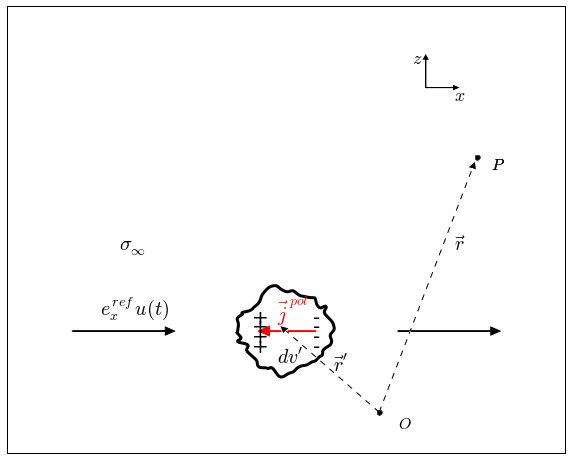

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.plot(xy_charbody[:,0], xy_charbody[:,1], 'k-', lw = 3)
for i in range(4):
    dy = 1-1.2*i
    ax.text(-3.5, dy, "+", fontsize = 20)
    ax.text( 3.0, dy, "-", fontsize = 20)
ax.set_xlim(-30, 30)
ax.set_ylim(-15, 40)
ax.arrow(-18.-5, 0., 10, 0, head_width = 1., head_length=1., fc = 'k')
ax.arrow(7.+5, 0., 10, 0, head_width = 1., head_length=1., fc = 'k')
ax.arrow(3.2, 0., -5., 0, head_width = 1.2, head_length=1.2, fc = 'r', ec = 'r')
ax.text(-15.-5, 2., "$e^{ref}_xu(t)$", fontsize = 20)
ax.text(-1.0, 1.2, "$\\vec{j}^{\ pol}$", fontsize = 20, color="r")
ax.text(-1., -4., "$dv'$", fontsize = 20, color="k")
ax.arrow(15., 10.+20., 3., 0, head_width = 0.5, head_length=0.5, fc = 'k')
ax.arrow(15., 10.+20., 0., 3.5, head_width = 0.5, head_length=0.5, fc = 'k')
ax.text(18.0, 8.5+20., "$x$", fontsize = 18)
ax.text(13.5, 13.+20., "$z$", fontsize = 18)
ax.plot(np.r_[10., 0.], np.r_[-10., 0.], 'k--', ms = 10)
ax.arrow(10., -10., -10., 10., head_width = 1., head_length=1., fc = 'k', color="w")
ax.plot(np.r_[10., 20.], np.r_[-10., 20.], 'k--', ms = 10)
ax.arrow(10., -10., 10., 30., head_width = 1., head_length=1., fc = 'k', color="w")
ax.plot(10, -10., 'k.', ms = 10)
ax.text(10+2, -10.-2, '$O$')
ax.plot(20+0.5, 20+1.5, 'k.', ms = 10)
ax.text(20+2, 20, '$P$')
ax.text(20+2, 20, '$P$')
ax.text(5, -5, "$\\vec{r}'$", fontsize = 20)
ax.text(18, 10, "$\\vec{r}$", fontsize = 20)
ax.text(-18, 10, "$\sigma_{\infty}$", fontsize = 20)

ax.set_xticks([])
ax.set_yticks([])
fig.savefig("../figures/ChargeableBlock.png", dpi = 100.)

In [16]:
def jofffun(siginf, eta, tau, time):
    b = 1./(1-eta)/tau
    joff = siginf*(1-eta)+siginf*eta*np.exp(-b*time)
    return joff

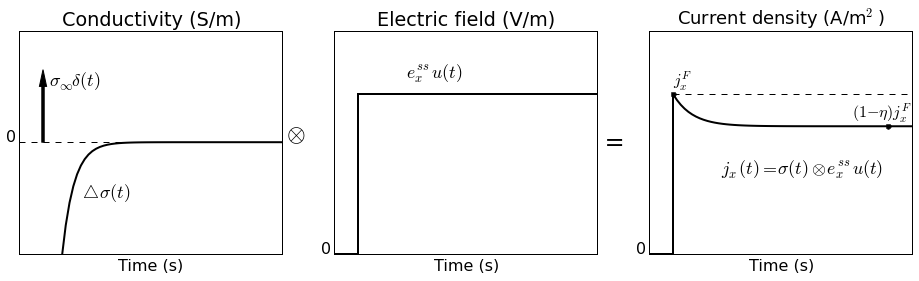

In [17]:
t = np.linspace(0., 0.1, 64)
fig, ax = plt.subplots(1,3, figsize = (16, 4))

ax[0].plot(t, ColeColeC1T(0.001, 0.5, 0.01, t), 'k', lw=2)
ax[0].plot(np.r_[-0.01, 0.1], np.zeros(2), 'k--')
ax[0].set_title("Conductivity (S/m)")
ax[0].set_xlabel("Time (s)")
ax[0].grid(True)
ax[0].set_xlim(-0.01, 0.1)
ax[0].set_ylim(-0.02, 0.02)
ax[0].text(0.0025, 0.01, "$\sigma_{\infty}\delta(t)$", fontsize = 18)
ax[0].text(0.015, -0.01, "$\\bigtriangleup\sigma(t)$", fontsize = 18)
ax[0].arrow(0., 0., 0., 0.01, head_width=0.003, head_length = 0.003, fc = 'k', ec = 'k')

ax[1].plot(np.r_[-0.01, 0.], np.zeros(2), 'k', lw=2)
ax[1].plot(np.r_[0., 0.1], np.ones(2), 'k', lw=2)
ax[1].plot(np.zeros(2), np.r_[0., 1.], 'k', lw=2)
ax[1].plot(np.r_[-0.01, 0.1], np.zeros(2), 'k--')
ax[1].text(0.02, 1.1, "$e^{ss}_xu(t)$", fontsize = 18)
ax[1].set_xlim(-0.01, 0.1)
ax[1].set_ylim(0., 1.4)
ax[1].set_title("Electric field (V/m)")
ax[1].set_xlabel("Time (s)")

ax[2].plot(t, jofffun(0.01, 0.2, 0.01, t), 'k', lw=2)
ax[2].plot(np.r_[-0.01, 0.], np.zeros(2), 'k', lw=2)
ax[2].set_xlim(-0.01, 0.1)
ax[2].set_ylim(-0., 0.014)
ax[2].plot(np.r_[-0.01, 0.1], np.zeros(2), 'k--')
ax[2].plot(np.zeros(2), np.r_[0., 0.01], 'k-', lw=2)
ax[2].plot(np.r_[0., 0.1], np.ones(2)*0.01, 'k--')
ax[2].text(0.02, 0.005, "$j_x(t)=\sigma(t)\otimes e^{ss}_xu(t)$", fontsize = 18)
ax[2].set_title("Current density (A/m$^2$)", fontsize = 18)
ax[2].set_xlabel("Time (s)")
ax[2].text(0., 0.0105, "$j_x^F$")
ax[2].plot(0., 0.01, 'k.', ms = 10)
ax[2].text(0.075, 0.0085, "$(1-\eta)j_x^F$")
ax[2].plot(0.09, 0.008, 'k.', ms = 10)
ax[0].text(-0.015, 0., "0")
ax[1].text(-0.015, 0., "0")
ax[2].text(-0.015, 0., "0")

ax[0].text(0.1, 0., "$\otimes$", fontsize = 24)
ax[1].text(0.1, 0.65, " =", fontsize = 24)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.savefig("../figures/Convolution_es.png", dpi = 100.)

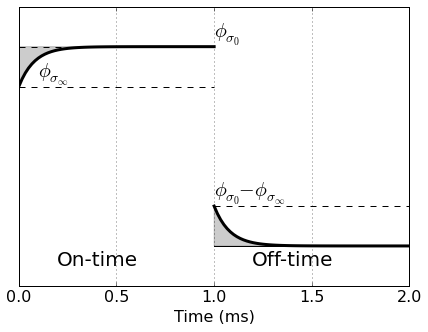

In [18]:
time_on = np.linspace(0, 1., 61)
time_off = time_on+time_on[-1]
eta = 0.2
tau = 0.1
temp_on = petaonfun(eta, tau, time_on)
temp_off = petaofffun(eta, tau, time_on)

fig = plt.figure(figsize = (7, 5))
# plt.xkcd()
plt.plot(time_on, temp_on, 'k-', lw = 3)
plt.plot(time_off, temp_off, 'k-', lw = 3)
plt.fill_between(time_on, np.ones(time_on.size), temp_on, color='k', alpha = 0.2)
plt.fill_between(time_off, temp_off, where=np.zeros(time_off.size)<=temp_off, color='k', alpha = 0.2)
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.xlabel('Time (ms)')
plt.ylabel('Potential (V)')
plt.text(0.1, 0.85, '$\phi_{\sigma_{\infty}}$', fontsize = 20)
plt.plot(np.r_[0,1],np.ones(2)*0.8, 'k--')
plt.text(1.0, 1.05, '$\phi_{\sigma_{0}}$', fontsize = 20)
plt.plot(np.r_[0,1],np.ones(2)*1., 'k--')
plt.text(1.0, 0.25, '$\phi_{\sigma_{0}}-\phi_{\sigma_{\infty}}$', fontsize = 20)
plt.plot(np.r_[1,2],np.ones(2)*0.2, 'k--')
plt.plot(np.r_[1,2],np.zeros(2), 'k-')
plt.text(0.2, -0.1, 'On-time', fontsize = 20)
plt.text(1.2, -0.1, 'Off-time', fontsize = 20)
ax1 = plt.axes()
ax1.axes.get_yaxis().set_visible(False)
fig.savefig("../figures/DCIP.png", dpi = 100.)